## Exploratory Data Analysis in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings(action= "ignore")

In [2]:
# 한글폰트 사용
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")

#### HDF5 형식  

HDF5는 Hierarchical Data Format이며 self-describing이 되는 고성능 데이터포맷 또는 DB, 운영체계와 무관하게 사용할 수 있으며, 대용량 데이터를 빠르게 읽고 쓸 수 있다.과학계산용 배열 데이터에 최적화

In [3]:
# pandas Series나 DataFrame객체로 저장가능 
f= pd.DataFrame({"A": np.random.randn(20)})
f.head()

,A
0,1.349996
1,0.395454
2,0.223379
3,0.836219
4,0.547835


In [4]:
s = pd.HDFStore('datah5.h5')
s['obj1'] = f
s['obj1_col'] =f["A"]
s

<class 'pandas.io.pytables.HDFStore'>
File path: datah5.h5

In [5]:
# dictionary 형식과 유사한 방식으로 사용
s["obj1"]

,A
0,1.349996
1,0.395454
2,0.223379
3,0.836219
4,0.547835
5,0.091192
6,0.688066
7,1.885378
8,1.595085
9,-0.287476


In [6]:
# HDFStore은 fixed 와 table 두가지 저장 스키마 지원 
s.put('obj2',f , format = 'table')

In [7]:
s.select('obj2', where = ['index >= 10 and index <= 15'])

,A
10,-0.043476
11,-0.490404
12,0.556435
13,1.647000
14,-0.179587
15,1.397872


In [8]:
#pandas.read_hdf 함수는  위의 기능들을 축약해서 사용 가능
f.to_hdf("datah5.h5", 'obj3', format = 'table')
h5 = pd.read_hdf("./datah5.h5", 'obj3', where = ['index >= 15'])
h5

,A
15,1.397872
16,-0.498100
17,-0.211018
18,-3.607438
19,0.940621


In [9]:
h5.columns

Index(['A'], dtype='object')

### Clean and Validate

In [10]:
df = sns.load_dataset('penguins')
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [11]:
sex = df['sex']
sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [12]:
#요약 통계 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
df.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### Filter and visualize

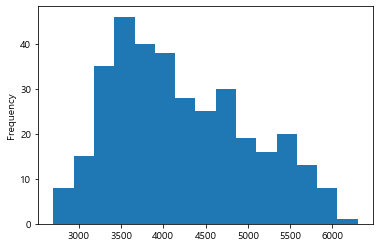

In [14]:
df['body_mass_g'].plot.hist(bins = 15)
plt.show()

In [15]:
# boolean  값 필터 사용 
bill_length_mm_45 = df["bill_length_mm"] >= 45
df[bill_length_mm_45]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,Male
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [16]:
# bill_length_mm_45 가 아닌 값 반환 != 동일 
df[~bill_length_mm_45]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,Female
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,Female
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,Female
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### Probability mass functions

PMF (확률질량 함수 ) 데이터셋의 고유 한 값과 각 값이 나타내는 빈도를 포함   
PMF는 각각의 값을 확률로 치환하는 방법으로 각각의 확률을 얻기 위해 표본의 크기 n으로 값을 나누는데 이것을 정규화 라고 한다.  
PMF는 x를 얻을 확률  
데이터에 고유한 값이 많은면 제대로 작동하지 않는다.  
pandas series를 기반 

{1,2,2,3,5}

PMF(1) = 1/5  
PMF(2) = 2/5  
PMF(3) = 1/5  
PMF(5) = 1/5  

### Cumulative distribution functions(누적분포함수)
CDF는 임의의 변수가 해당 x 값보다 작거나 같은 값을 가질 확률을 y 값이 나타내는 함수  
주어진 확률 분포에서 확률변수가 특정 값보다 작거나 같은 확률  
이상치에 robust

CDF는 <= X 값을 얻을 확률 

{1,2,2,3,5}

CMF(1) = 1/5  
CMF(2) = 3/5  
CMF(3) = 4/5  
CMF(5) = 1/5  

In [17]:
#from empiricaldist import Pmf 

pmf 그래프 생성 
시리즈로 전환해서 hist 만들어서 사용 

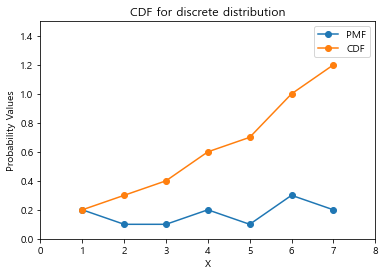

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 통상적으로 막대그래프로 표현한다. 

x=np.arange(1,8)
y=[0.2,0.1,0.1,0.2,0.1,0.3,0.2]
cdf=np.cumsum(y) # CDF에 대한 y- 값을 계산하기 위해numpy.cumsum()메서드를 사용하여 배열의 누적 합계를 계산

plt.plot(x,y, marker="o",label="PMF")
plt.plot(x,cdf,marker="o",label="CDF")
plt.xlim(0,8)
plt.ylim(0,1.5)
plt.xlabel("X")
plt.ylabel("Probability Values")
plt.title("CDF for discrete distribution")
plt.legend()
plt.show()

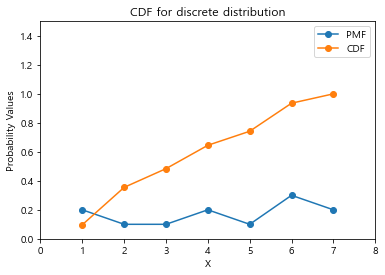

In [19]:
# CDF는 연속 및 이산 확률 분포 모두에 대해 정의됩니다. 
# 연속 확률 분포에서 랜덤 변수는 지정된 범위의 값을 취할 수 있지만 이산 확률 분포에서는 지정된 값 세트 만 가질 수 있습니다.

import numpy as np
import matplotlib.pyplot as plt 

x=np.arange(1,8)
frequency=np.array([3,8,4,5,3,6,2])
pdf=frequency/np.sum(frequency)
cdf=np.cumsum(pdf)


plt.plot(x,y, marker="o",label="PMF")
plt.plot(x,cdf,marker="o",label="CDF")
plt.xlim(0,8)
plt.ylim(0,1.5)
plt.xlabel("X")
plt.ylabel("Probability Values")
plt.title("CDF for discrete distribution")
plt.legend()
plt.show()

#### IQR (Interquartile range) Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이

In [20]:
# pandas quantile 사용 ,quantile 은 수치 데이터를 크기 순서로 정렬했을 때 0% ~ 100% (0 ~ 1) 위치에 해당하는 숫자를 리턴

n = pd.Series(np.arange(1,11))

Q1 = n.quantile(.25)
Q3 = n.quantile(.75)
IQR = Q3 - Q1

Q2 = n.quantile(.5)
Q4 = n.quantile(1)

print("Q1 =",Q1)
print("Q3 =",Q3)
print("IQR =",IQR)
print("Q2 =",Q2)
print("Q4 =",Q4)

Q1 = 3.25
Q3 = 7.75
IQR = 4.5
Q2 = 5.5
Q4 = 10.0


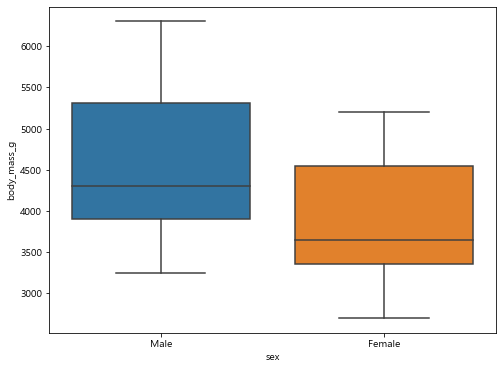

In [21]:
# 펭귄데이터 사용 
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(df["sex"], df["body_mass_g"], ax = ax ) 
plt.show()


#whisker - 상자의 좌우 또는 상화로 뻗어나가 선  

#박스 내부의 가로선 - 중앙값  

#lower whisker - 최솟값(중앙값 - 1.5 * IQR 보다 큰 데이터 중 가장 작은 값)  

#upper whisker - 최댓값(중앙값 + 1.5*IQR 보다 작은 데이터 중 가장 큰 값)  

#IQR(Inter Quartile Range) - 제3 사분위수 - 제1 사분위수   

#이상치 - lower whisker 보다 작은 데이터 또는 upper whisker 보다 큰 데이터  

### Modeling distributions

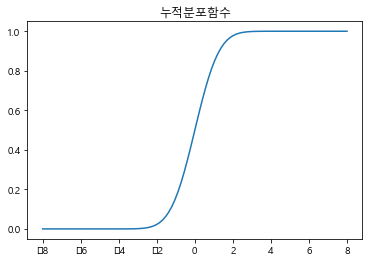

In [22]:
# Normal distribution 정규분포 
#SciPy는 과학 및 수학 문제를 해결하는 데 사용되는 오픈 소스 Python 라이브러리입니다. 
#NumPy 확장을 기반으로하며 사용자가 다양한 고급 명령으로 데이터를 조작하고 시각화 할 수 있습니다.
#앞서 언급했듯이 SciPy는 NumPy를 기반으로하므로 SciPy를 가져 오면 NumPy를 가져올 필요가 없습니다.

import scipy as sp 
import scipy.stats

# 정규분포 객체 생성 
rv = sp.stats.norm() # norm (평균, 표준편차)

xx = np.linspace(-8, 8, 100) # 동일한 간격의 배열 생성 
cdf = rv.cdf(xx)

plt.plot(xx , cdf )
plt.title("누적분포함수")
plt.show()

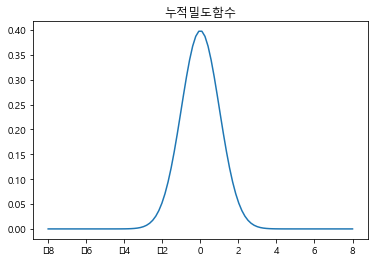

In [23]:
xs = np.linspace(-8 , 8 , 100)
pdf = rv.pdf(xs)

plt.plot(xs , pdf)
plt.title("누적밀도함수")
plt.show()

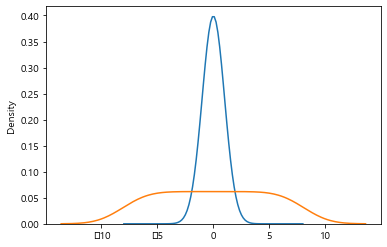

In [24]:
# Kde 커널밀도추정
# 어떠한 사전 정보나 지식 없이 순수하게 관측된 데이터만으로 확률밀도함수를 추정해야 하는데 이를 non-parametric density estimation
# Kernel Density Estimation (커널 밀도 추정) 방법은 non-parametric 밀도추정 방법 중 하나로서 
# 커널함수(kernel function)를 이용하여 히스토그램 방법의 문제점을 개선한 방법
# 확률질량함수인 PMF에서 확률밀도 함수인 PDF로 이동하는 방법 

xs = np.linspace(-8 , 8 , 100)
pdf = rv.pdf(xs)

plt.plot(xs , pdf)
sns.kdeplot(xs)


plt.show()